# Linear Regression without Standard Scaler

Aim : Predict Salary of Employee by Years of Expereience

Defining Libraries

In [2]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when,sum,mean,isnan,isnull,count

Reading CSV input File

In [3]:
spark = SparkSession.builder.appName("LinearPreprocessing").config("spark.driver.bindAddress", "10.0.2.15").getOrCreate()

spark_df = spark.read.csv("Salary_Data.csv",header=True,inferSchema=True)

spark_df.show()

23/07/24 20:16:08 WARN Utils: Your hostname, UbuntuOS resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/07/24 20:16:08 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/07/24 20:16:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/07/24 20:16:11 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
+---------------+-------+
|YearsExperience| Salary|
+---------------+-------+
|            1.1|39343.0|
|            1.3|46205.0|
|            1.5|37731.0|
|            2.0|43525.0|
|            2.2|39891.0|
|            2.9|56642.0|
|            3.0|60150.0|
|            3.2|54445.0|
|            3.2|64445.0|
|            3.7|57189.0|
|            3.9|63218.0|
|            4.0|55794.0|
|            4.0|56957.0|
|            4.1|57081.0|
|            4.5|61111.0|
|            4.9|67938.0|
|            5.1|66029.0|
|            5.3|83088.0|
|            5.9|81363.0|
|            6.0|93940.0|
+---------------+-------+
only showing top 20 rows



Describe Dataset

In [4]:
spark_df.describe().show()

+-------+------------------+------------------+
|summary|   YearsExperience|            Salary|
+-------+------------------+------------------+
|  count|                30|                30|
|   mean|5.3133333333333335|           76003.0|
| stddev| 2.837888157662718|27414.429784582302|
|    min|               1.1|           37731.0|
|    max|              10.5|          122391.0|
+-------+------------------+------------------+



Dataset Summary

In [5]:

spark_df.printSchema()

root
 |-- YearsExperience: double (nullable = true)
 |-- Salary: double (nullable = true)



In [6]:
spark_df.head(10)

[Row(YearsExperience=1.1, Salary=39343.0),
 Row(YearsExperience=1.3, Salary=46205.0),
 Row(YearsExperience=1.5, Salary=37731.0),
 Row(YearsExperience=2.0, Salary=43525.0),
 Row(YearsExperience=2.2, Salary=39891.0),
 Row(YearsExperience=2.9, Salary=56642.0),
 Row(YearsExperience=3.0, Salary=60150.0),
 Row(YearsExperience=3.2, Salary=54445.0),
 Row(YearsExperience=3.2, Salary=64445.0),
 Row(YearsExperience=3.7, Salary=57189.0)]

In [7]:
spark_df.tail(3)

[Row(YearsExperience=9.6, Salary=112635.0),
 Row(YearsExperience=10.3, Salary=122391.0),
 Row(YearsExperience=10.5, Salary=121872.0)]

Row and Column Count

In [8]:
row_count = spark_df.count()

column_count = len(spark_df.columns)

print(f"({row_count},{column_count})") 


(30,2)


Display dataset Columns

In [9]:

spark_df.columns

['YearsExperience', 'Salary']

Checking null values

In [10]:
spark_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in spark_df.columns]).show()

+---------------+------+
|YearsExperience|Salary|
+---------------+------+
|              0|     0|
+---------------+------+



Plotting YearsExperience vs Salary plot

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

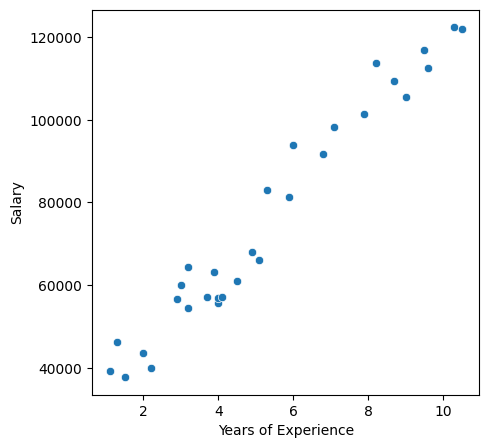

In [12]:
# Scatter Plot
scatter_plot_df = spark_df.toPandas()

plt.figure(figsize=(5,5))
sns.scatterplot(x="YearsExperience",y="Salary",data=scatter_plot_df)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

# Display plot
plt.show()



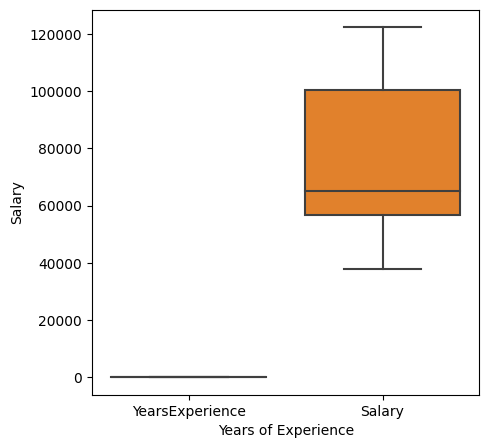

In [13]:
# Scatter Plot
plt.figure(figsize=(5,5))
sns.boxplot(data=scatter_plot_df)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

# Display plot
plt.show()

# Training Model

Define necessary libraries

In [14]:
from pyspark.ml.feature import StandardScaler , VectorAssembler
from pyspark.ml import Pipeline

Transfrom feature dat into vectors

In [15]:
assemblers = VectorAssembler(inputCols=['YearsExperience'],outputCol='feature')


In [16]:
output = assemblers.transform(spark_df)
output.show()

+---------------+-------+-------+
|YearsExperience| Salary|feature|
+---------------+-------+-------+
|            1.1|39343.0|  [1.1]|
|            1.3|46205.0|  [1.3]|
|            1.5|37731.0|  [1.5]|
|            2.0|43525.0|  [2.0]|
|            2.2|39891.0|  [2.2]|
|            2.9|56642.0|  [2.9]|
|            3.0|60150.0|  [3.0]|
|            3.2|54445.0|  [3.2]|
|            3.2|64445.0|  [3.2]|
|            3.7|57189.0|  [3.7]|
|            3.9|63218.0|  [3.9]|
|            4.0|55794.0|  [4.0]|
|            4.0|56957.0|  [4.0]|
|            4.1|57081.0|  [4.1]|
|            4.5|61111.0|  [4.5]|
|            4.9|67938.0|  [4.9]|
|            5.1|66029.0|  [5.1]|
|            5.3|83088.0|  [5.3]|
|            5.9|81363.0|  [5.9]|
|            6.0|93940.0|  [6.0]|
+---------------+-------+-------+
only showing top 20 rows



In [17]:
import pyspark.sql.functions as F

Replacing Scaled columns with independent variables

In [18]:

spark_df = output.withColumn("YearsExperience",F.col("feature"))

spark_df.show()

+---------------+-------+-------+
|YearsExperience| Salary|feature|
+---------------+-------+-------+
|          [1.1]|39343.0|  [1.1]|
|          [1.3]|46205.0|  [1.3]|
|          [1.5]|37731.0|  [1.5]|
|          [2.0]|43525.0|  [2.0]|
|          [2.2]|39891.0|  [2.2]|
|          [2.9]|56642.0|  [2.9]|
|          [3.0]|60150.0|  [3.0]|
|          [3.2]|54445.0|  [3.2]|
|          [3.2]|64445.0|  [3.2]|
|          [3.7]|57189.0|  [3.7]|
|          [3.9]|63218.0|  [3.9]|
|          [4.0]|55794.0|  [4.0]|
|          [4.0]|56957.0|  [4.0]|
|          [4.1]|57081.0|  [4.1]|
|          [4.5]|61111.0|  [4.5]|
|          [4.9]|67938.0|  [4.9]|
|          [5.1]|66029.0|  [5.1]|
|          [5.3]|83088.0|  [5.3]|
|          [5.9]|81363.0|  [5.9]|
|          [6.0]|93940.0|  [6.0]|
+---------------+-------+-------+
only showing top 20 rows



Drop extra columns

In [19]:
spark_df = spark_df.drop("feature")

spark_df.show()

+---------------+-------+
|YearsExperience| Salary|
+---------------+-------+
|          [1.1]|39343.0|
|          [1.3]|46205.0|
|          [1.5]|37731.0|
|          [2.0]|43525.0|
|          [2.2]|39891.0|
|          [2.9]|56642.0|
|          [3.0]|60150.0|
|          [3.2]|54445.0|
|          [3.2]|64445.0|
|          [3.7]|57189.0|
|          [3.9]|63218.0|
|          [4.0]|55794.0|
|          [4.0]|56957.0|
|          [4.1]|57081.0|
|          [4.5]|61111.0|
|          [4.9]|67938.0|
|          [5.1]|66029.0|
|          [5.3]|83088.0|
|          [5.9]|81363.0|
|          [6.0]|93940.0|
+---------------+-------+
only showing top 20 rows



Splitting data into train and test data

In [20]:
split_dataset = spark_df.randomSplit([0.7,0.3],seed=42)
train_data = split_dataset[0]
test_data = split_dataset[1]

In [21]:
train_data.show()
test_data.show()

+---------------+--------+
|YearsExperience|  Salary|
+---------------+--------+
|          [1.1]| 39343.0|
|          [1.3]| 46205.0|
|          [2.0]| 43525.0|
|          [2.2]| 39891.0|
|          [2.9]| 56642.0|
|          [3.2]| 54445.0|
|          [3.9]| 63218.0|
|          [4.0]| 55794.0|
|          [4.0]| 56957.0|
|          [5.1]| 66029.0|
|          [5.3]| 83088.0|
|          [5.9]| 81363.0|
|          [6.8]| 91738.0|
|          [7.9]|101302.0|
|          [9.0]|105582.0|
|          [9.5]|116969.0|
|          [9.6]|112635.0|
+---------------+--------+

+---------------+--------+
|YearsExperience|  Salary|
+---------------+--------+
|          [1.5]| 37731.0|
|          [3.0]| 60150.0|
|          [3.2]| 64445.0|
|          [3.7]| 57189.0|
|          [4.1]| 57081.0|
|          [4.5]| 61111.0|
|          [4.9]| 67938.0|
|          [6.0]| 93940.0|
|          [7.1]| 98273.0|
|          [8.2]|113812.0|
|          [8.7]|109431.0|
|         [10.3]|122391.0|
|         [10.5]|121872.0|


Spliting data into different axis

In [22]:
X_train = train_data.select('YearsExperience')
X_test = test_data.select('YearsExperience')

y_train = train_data.select("Salary")
y_test = test_data.select('Salary')

Training the linear regression model

In [23]:
from pyspark.ml.regression import LinearRegression

In [24]:
regr = LinearRegression(featuresCol='YearsExperience',labelCol='Salary',regParam=0.0, solver="normal")
regr_model = regr.fit(train_data)

23/07/24 20:16:26 WARN Instrumentation: [b4fc4f28] regParam is zero, which might cause numerical instability and overfitting.
23/07/24 20:16:26 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/07/24 20:16:26 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/07/24 20:16:26 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Determine coefficient of model

In [25]:
regr_model.coefficients

DenseVector([9151.9659])

Determine Intercept of model

In [26]:
regr_model.intercept

26394.497269767566

# Evaluate Model

Evaluate Model for predictions

In [27]:
x_pred = regr_model.evaluate(train_data)
x_pred.predictions.show()

+---------------+--------+------------------+
|YearsExperience|  Salary|        prediction|
+---------------+--------+------------------+
|          [1.1]| 39343.0| 36461.65976744196|
|          [1.3]| 46205.0|  38292.0529488373|
|          [2.0]| 43525.0| 44698.42908372101|
|          [2.2]| 39891.0| 46528.82226511635|
|          [2.9]| 56642.0| 52935.19840000005|
|          [3.2]| 54445.0|55680.788172093075|
|          [3.9]| 63218.0|62087.164306976774|
|          [4.0]| 55794.0| 63002.36089767444|
|          [4.0]| 56957.0| 63002.36089767444|
|          [5.1]| 66029.0| 73069.52339534884|
|          [5.3]| 83088.0| 74899.91657674419|
|          [5.9]| 81363.0| 80391.09612093022|
|          [6.8]| 91738.0| 88627.86543720926|
|          [7.9]|101302.0| 98695.02793488366|
|          [9.0]|105582.0|108762.19043255805|
|          [9.5]|116969.0|113338.17338604642|
|          [9.6]|112635.0|114253.36997674408|
+---------------+--------+------------------+



Model Evaluation on Test Data

In [28]:
y_pred = regr_model.evaluate(test_data)
y_pred.predictions.show()


+---------------+--------+------------------+
|YearsExperience|  Salary|        prediction|
+---------------+--------+------------------+
|          [1.5]| 37731.0|40122.446130232645|
|          [3.0]| 60150.0| 53850.39499069772|
|          [3.2]| 64445.0|55680.788172093075|
|          [3.7]| 57189.0|60256.771125581436|
|          [4.1]| 57081.0| 63917.55748837211|
|          [4.5]| 61111.0|  67578.3438511628|
|          [4.9]| 67938.0|  71239.1302139535|
|          [6.0]| 93940.0| 81306.29271162789|
|          [7.1]| 98273.0| 91373.45520930228|
|          [8.2]|113812.0|101440.61770697667|
|          [8.7]|109431.0|106016.60066046503|
|         [10.3]|122391.0| 120659.7461116278|
|         [10.5]|121872.0|122490.13929302314|
+---------------+--------+------------------+



# Performance metrices

Determine Performance metrices of Linear regression Model

In [29]:
from pyspark.ml.evaluation import RegressionEvaluator

In [30]:
predictions = regr_model.transform(test_data)

Root mean square Error

R squared 

In [31]:
evaluator_r2 = RegressionEvaluator(labelCol="Salary", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print("R-squared value:", r2)


R-squared value: 0.9394152802185344


R2 score

In [32]:
r2_score = regr_model.summary.r2
print("R2 score:",r2)

R2 score: 0.9394152802185344


Stopping Spark session

In [ ]:
spark.stop()